In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
dataset = pd.read_csv('spam.csv' , encoding='latin-1')

In [3]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
dataset.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'] , inplace=True)

In [6]:
dataset.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
dataset['v1'] = dataset['v1'].map({'ham':0 , 'spam':1})

In [8]:
dataset.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dataset.isna().sum()

v1    0
v2    0
dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


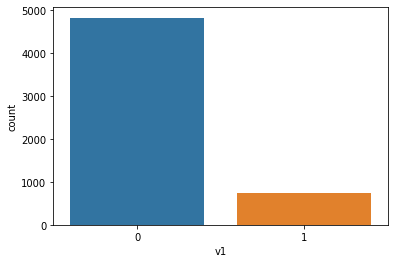

In [10]:
sns.countplot(dataset['v1'])

In [11]:
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [13]:
corpus = []

In [14]:
dataset['v2'][1]

'Ok lar... Joking wif u oni...'

In [15]:
for i in range(0 , len(dataset)):
  message = re.sub('[^a-zA-Z]' , ' ' , dataset['v2'][i])
  message = message.lower()
  message = message.split()
  ss = SnowballStemmer(language='english')
  message = [ss.stem(word) for word in message if not word in set(stopwords.words('english'))]
  message = ' '.join(message)
  corpus.append(message)

In [16]:
corpus[2]

'free entri wkli comp win fa cup final tkts st may text fa receiv entri question std txt rate c appli'

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[: , 0].values

In [18]:
X.shape

(5572, 6216)

In [19]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [20]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y, test_size = 0.2 , random_state = 0)

In [21]:
x_train.shape

(4457, 6216)

In [22]:
x_test.shape

(1115, 6216)

In [23]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(x_train , y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [24]:
y_pred = classifier.predict(x_test)

In [25]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

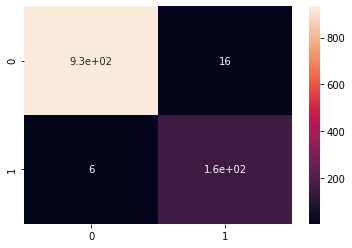

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
sns.heatmap(cm , annot=True)

In [27]:
from sklearn.metrics import precision_score , recall_score
print(precision_score(y_test , y_pred))
print(recall_score(y_test , y_pred))

0.9090909090909091
0.963855421686747


In [34]:
txt = 'What\'s up buddy how are you doing man' 

In [35]:
txt = np.array([txt])

In [36]:
txt = cv.transform(txt)

In [38]:
classifier.predict(txt)

array([0])

In [39]:
import pickle

In [40]:
pickle.dump(classifier , open('model.pkl' , 'wb'))

In [41]:
pickle.dump(cv , open('vector.pkl' , 'wb'))